# Lab 1: Filtering operations

## Python packages
NumPy: Used functions related to linear algebra and matrix representation. <br>
SciPy: Used for convolution <br>
Matplotlib: Used for displaying images and graphs <br>
Functions: Used to access files related to the course <br>

In [155]:
import numpy as np
import matplotlib.pyplot as  plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d
from Functions import *
from fftwave import fftwave
from gaussfft import gaussfft

### Section 1.3

This block contains some of the pre-work files used to understand the functions.

Fhat


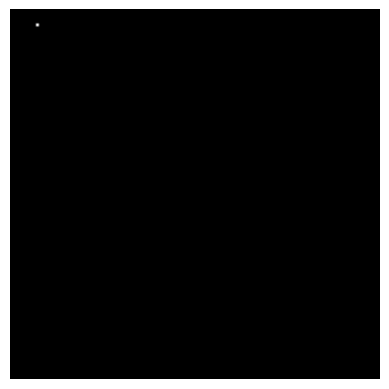

real part


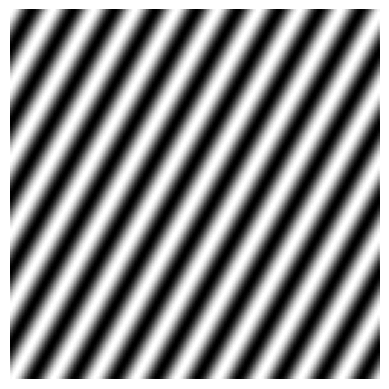

imaginary part


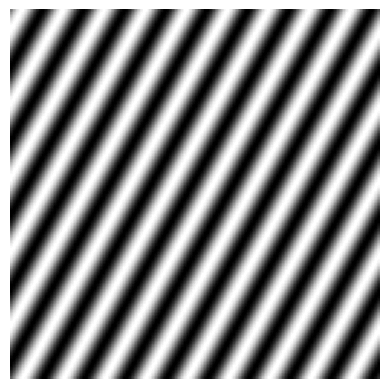

magnitude


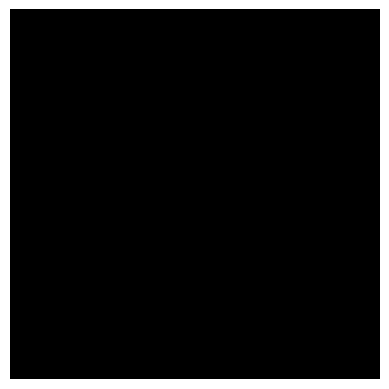

phase


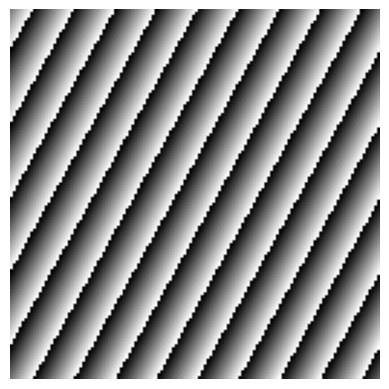

In [156]:
# this is used to set the values for p and q
p = 5
q = 9

# function is zero everywhere except point (p,q).                           
Fhat = np.zeros((128,128))
Fhat[p, q] = 1

# this is used to show the image
print("Fhat")
showgrey(Fhat, True)

# compute inverse discrete fourier transfom
F = ifft2(Fhat)

# to look at the real and imaginary parts as well as magnitude 
# and phase
Fabsmax = np.max(np.abs(F))
print("real part")
showgrey(np.real(F), True, 64, -Fabsmax, Fabsmax)
print("imaginary part")
showgrey(np.imag(F), True, 64, -Fabsmax, Fabsmax)
print("magnitude")
showgrey(np.abs(F), True, 64, -Fabsmax, Fabsmax)
print("phase")
showgrey(np.angle(F), True, 64, -np.pi, np.pi)

**Question 1** Repeat this exercise with the coordinates p and q set to (5, 9), (9, 5), (17, 9), (17, 121),
(5, 1) and (125, 1) respectively. What do you observe?

**Answer** <br>
As per my understanding, the points all correspond to the frequency component at a point in the image. The p value stands for the x-component of the frequency while the q value stands for the y-component of the frequency.<br>
<br>
***Fhat***: shows where the frequency component lies on the frequency plane given that the top left corner denotes zero frequency <br>
***Centered Fhat***: shows where the frequency component lies on the frequency plane given that the centre denotes zero frequency <br>
***Real***: this corresponds to the cosine component of the fourier transform and denotes the magnitude of the signal at that point<br>
***Imaginary***: this corresponds to the sine component of the fourier transform and denotes the phase shift of the signal <br>
***Absolute***: this is overall amplitude of the fourier transform <br>
***Angle***: this is the overall wavelength of the fourier transform <br>
<br>
As the points move further away from the zero frequency component, it can be seen that the wavelength decreases, hence showing that the frequency increases as the point moves further away from the origin.

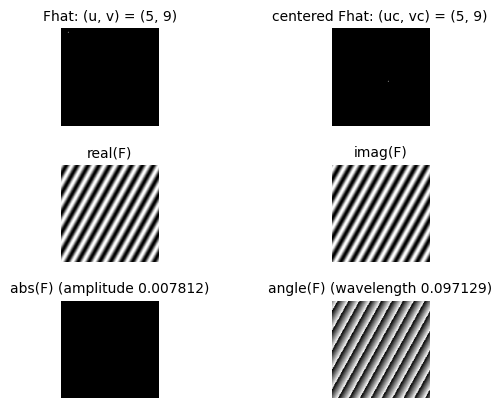

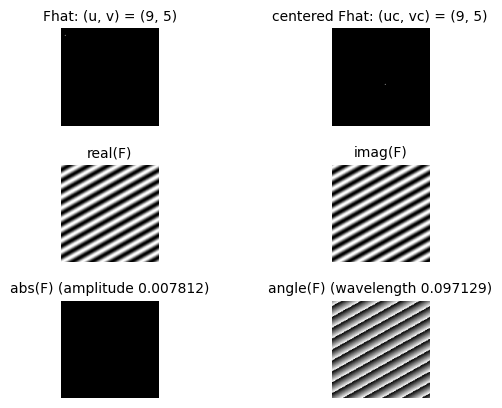

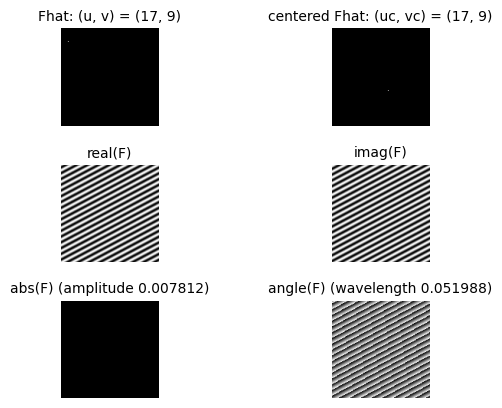

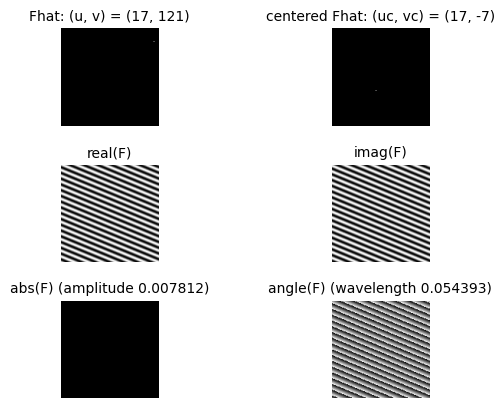

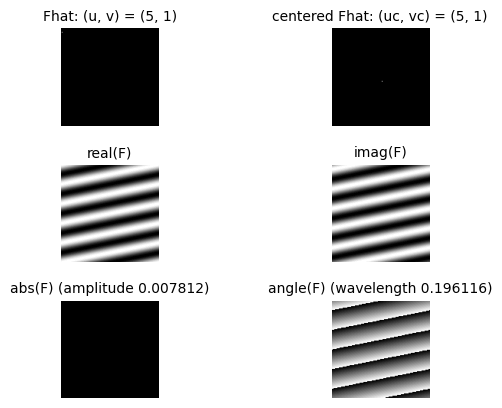

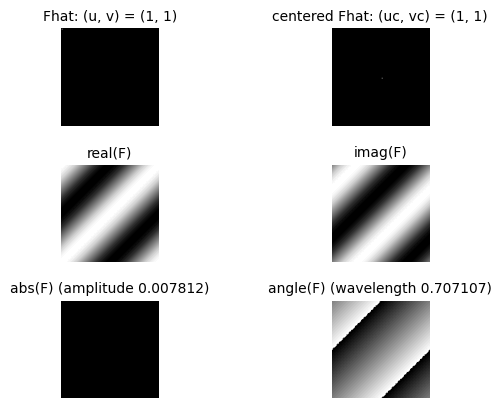

In [157]:
def question_1():
    p = [5,9,17,17,5,1]
    q = [9,5,9,121,1,1]

    for counter in range(6):
        fftwave(p[counter], q[counter])

question_1()

**Question 2** Explain how a position (p, q) in the Fourier domain will be projected as a sine wave in
the spatial domain. Illustrate with a figure.

**Answer** <br>
The position represents the frequency and orientation of the sinusoidal waves. The below equation represents the inverse Fourier transform in the discrete domain. <br>
$F(x) = \frac{1}{N}\sum_{u\in[0:N-1]^2} \hat{F}(u) e^{(\frac{2(\pi)iu^Tx}{N})} $ <br> 
Applying the inverse Fourier transform at the point (p,q), we get,<br>
$F(x) = \frac{1}{N}e^{(\frac{2(\pi)i(p,q)^Tx}{N})} $ <br>
The below equation shows the Euler identity formula. <br>
$\exp(i\omega^Tx) = cos(\omega^Tx) + isin(\omega^Tx)$ <br>
By applying the Euler Identity to the inverse Fourier transform, we get, <br>
$F(x) = \frac{1}{N}cos(\frac{2\pi(p,q)^Tx}{N}) + i\frac{1}{N}sin(\frac{2\pi(p,q)^Tx}{N})$ <br> 

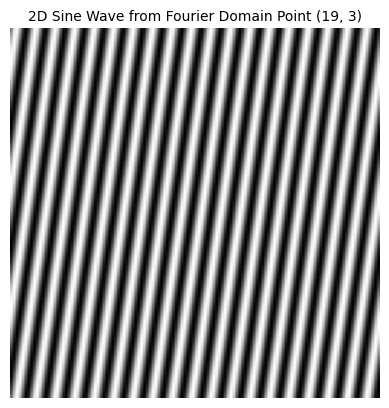

In [158]:
def question_2(p, q, size):
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    # Create a 2D Sine wave
    sine_wave = 1/size * np.sin(2 * np.pi * (p * X + q * Y) / size)

    plt.imshow(sine_wave, cmap="gray")
    plt.title(f"2D Sine Wave from Fourier Domain Point ({p}, {q})")
    plt.axis("off")
    plt.show()


question_2(19,3,128)

**Question 3**  How large is the amplitude? Write down the expression derived from Equation (4) in
these notes. Complement the code (variable amplitude) accordingly.

**Answer** <br>
The below equation represents the inverse Fourier transform in the discrete domain. <br>
$F(x) = \frac{1}{N}\sum_{u\in[0:N-1]^2} \hat{F}(u) e^{(\frac{2{\pi}iu^Tx}{N})} $ <br> 
Applying the inverse Fourier transform at the point (p,q), we get,<br>
$F(x) = \frac{1}{N}e^{(\frac{2{\pi}i(p,q)^Tx}{N})} $ <br>
By applying the Euler Identity to the inverse Fourier transform, we get, <br>
$F(x) = \frac{1}{N}cos(\frac{2{\pi}(p,q)^Tx}{N}) + i\frac{1}{N}sin(\frac{2\pi(p,q)^Tx}{N})$ <br>
The amplitude of the inverse Fourier Transform is,
$|F(x)| = \frac{1}{N}$

**Question 4** How does the direction and length of the sine wave depend on p and q? Write down the
explicit expression that can be found in the lecture notes. Complement the code (variable wavelength)
accordingly.

**Answer** <br>
To find the phase of the sine wave (direction), we use, <br>
$\phi=tan^{-1}(\frac{Im[Fhat(u,v)]}{Re[Fhat(u,v)]})$<br>
The wavelength of the sine wave is given by, <br>
$\lambda = \frac{1}{\sqrt{u^2+v^2}}$

**Question 5** What happens when we pass the point in the center and either p or q exceeds half the
image size? Explain and illustrate graphically with a figure!

**Answer** <br>
When either p or q exceeds half the image size, aliasing can occur causing the signal to lose information.

**Question 6**  What is the purpose of the instructions following the question: What is done by
these instructions? in the code?

**Answer** <br>
These instructions provide the coordinates for the x and y frequency components after centering the zero-frequency component on the graph.

### Section 1.4

This block contains some of the pre-work files used to understand the functions.

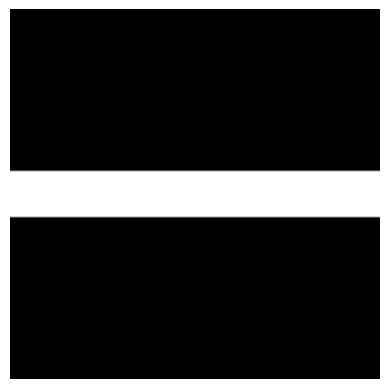

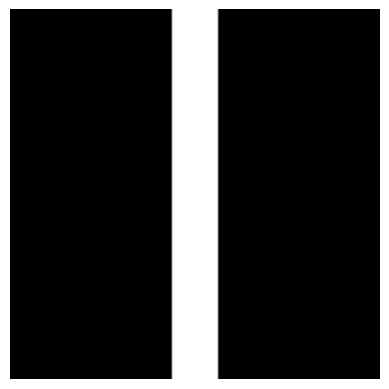

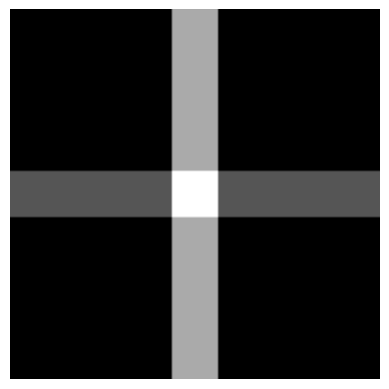

In [159]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T
H = F + 2*G

showgrey(F,True)
showgrey(G, True)
showgrey(H,True)

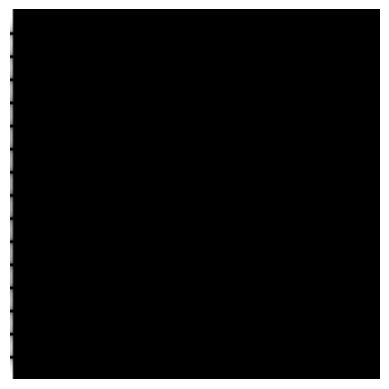

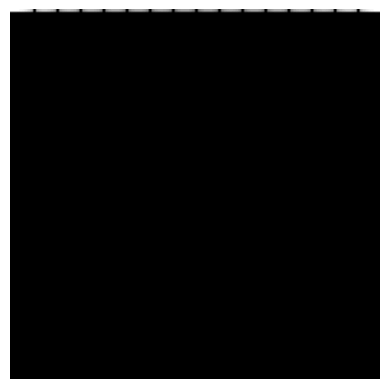

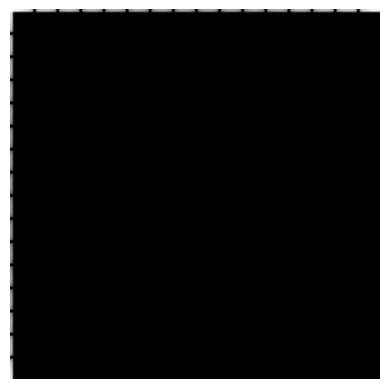

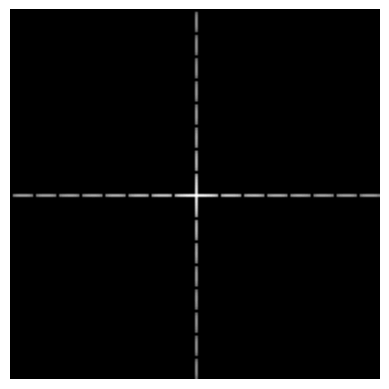

In [160]:
Fhat = fft2(F)
Ghat = fft2(G)
Hhat = fft2(H)

showgrey(np.log(1 + np.abs(Fhat)))
showgrey(np.log(1 + np.abs(Ghat)))
showgrey(np.log(1 + np.abs(Hhat)))

showgrey(np.log(1 + np.abs(fftshift(Hhat))))

**Question 7** Why are these Fourier spectra concentrated to the borders of the images? Can you
give a mathematical interpretation? Hint: think of the frequencies in the source image and consider
the resulting image as a Fourier transform applied to a 2D function. It might be easier to analyze each
dimension separately!

**Answer** <br>
For the discrete fourier transform in two dimensions, we have, <br>
$\hat{F}(u,v) = \sum_{x=0}^{M-1}\sum_{y=0}^{M-1}f(x,y)e^{-2{\pi}i(\frac{xu}{M}+\frac{yv}{N})}$<br>
For the above signal, we get, <br>
$\hat{F}(u,v) = \sum_{x=57}^{72}\sum_{y=0}^{127}e^{-2{\pi}i(\frac{xu}{128}+\frac{yv}{128})}$<br>
$\hat{F}(u,v) = \sum_{x=57}^{72}\sum_{y=0}^{127}e^{-2{\pi}i(\frac{xu}{128})}e^{-2{\pi}i(\frac{yv}{128})}$<br>
$\hat{F}(u,v) = \sum_{x=57}^{72}e^{-2{\pi}i(\frac{xu}{128})}\sum_{y=0}^{127}e^{-2{\pi}i(\frac{yv}{128})}$<br>
$\hat{F}(u,v) = N\sum_{x=57}^{72}e^{-2{\pi}i(\frac{xu}{128})}\sum_{y=0}^{127}e^{-2{\pi}i(\frac{yv}{128})}$<br>

**Question 8** Why is the logarithm function applied?

**Answer** <br>
The logarithm function is used to make more details visible by accounting for a large dynamic range and allowing lower ranges to become more visible. 

**Question 9** What conclusions can be drawn regarding linearity? From your observations can you
derive a mathematical expression in the general case?

**Answer** <br>
In the Fourier domain, the linearity of the signal is preserved. The fourier transforms of F and G can be seen within the first two graphs. It can be observed that adding the Fourier transforms of the individual signals is equivalent to evaluating the Fourier transform of the combined signal. We can write the general mathematical form as, <br>
$\mathcal{F}\left(f\left(t\right)+g\left(t\right)\right)=F\left(\omega\right)+G\left(\omega\right)$

### Section 1.5

This code block contains some of the prework files.

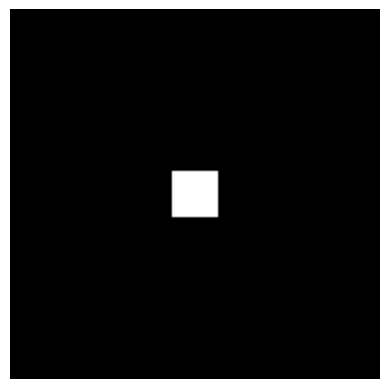

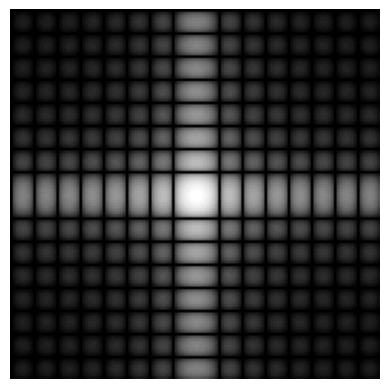

In [161]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T 

showgrey(F*G)
showfs(fft2(F*G))

**Question 10** Are there any other ways to compute the last image? Remember what multiplication
in Fourier domain equals to in the spatial domain! Try to perform these alternative computations in
practice, if you want.

**Answer** <br>
When multiplying in the Fourier domain, it is an equivalent of convolution in the Spatial domain. Another way to compute the same image is to convolve the two signals, then perform a Fourier transform on it to obtain the image above. <br>
$f(x)*g(x) = F(u)G(u)$

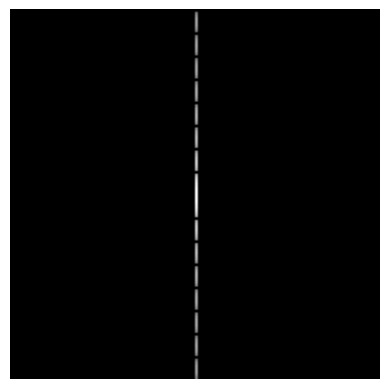

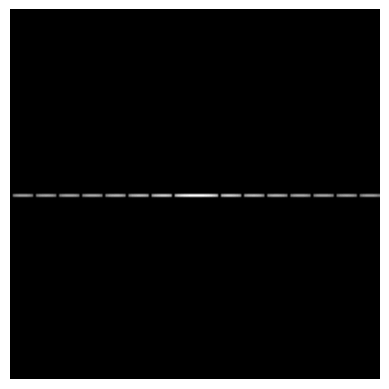

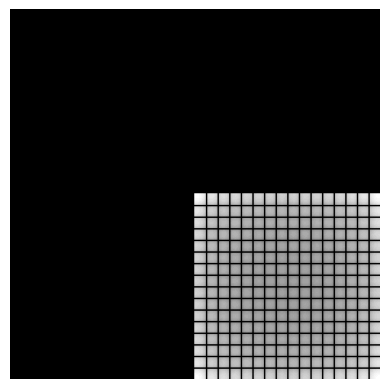

In [162]:
FHat = fft2(F)
GHat = fft2(G)
showfs(FHat)
showfs(GHat)
FGHat = convolve2d(FHat,GHat)
showfs(FGHat)

### Section 1.6

This code block contains some of the prework files.

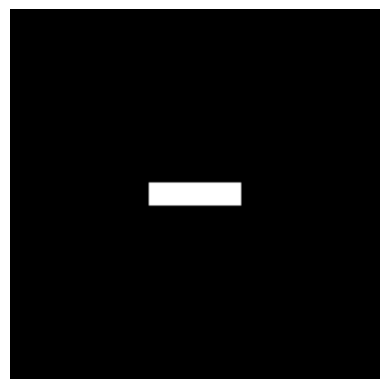

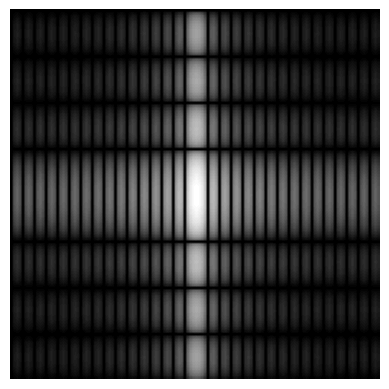

In [163]:
F = np.concatenate([np.zeros((60,128)), np.ones((8,128)), np.zeros((60,128))]) * \
np.concatenate([np.zeros((128,48)), np.ones((128,32)), np.zeros((128,48))], axis=1)
showgrey(F, True)
showfs(fft2(F))

**Question 11** What conclusions can be drawn from comparing the results with those in the previous
exercise? See how the source images have changed and analyze the effects of scaling.

**Answer** <br>
The image, in spatial domain, has been shrunk in the y-axis and expanded in the x-axis. This corresponds to expanding in the y-axis of the Fourier domain and the shrinking in the x-axis in the Fourier domain.

### Section 1.7

This code block contains some of the prework files.

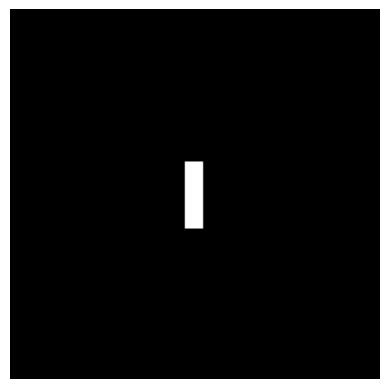

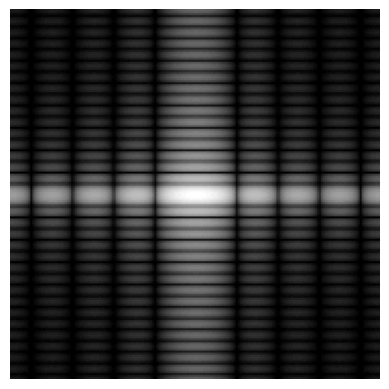

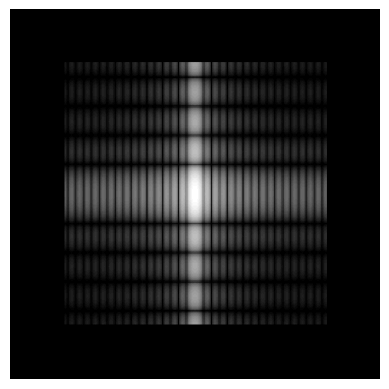

In [169]:
alpha = 90  
G = rot(F, alpha )
showgrey(G)
Ghat = fft2(G)
showfs(Ghat)

Hhat = rot(fftshift(Ghat), -alpha )
showgrey(np.log(1 + abs(Hhat)))

**Question 12** What can be said about possible similarities and differences? Hint: think of the
frequencies and how they are affected by the rotation.

When an image is rotated in the spatial domain, its equivalent representation in the frequency domain is also rotated. The value of the frequencies at each point remain the same except that they are rotated with the spatial image. When rotating an image at non-orthogonal angles, aliasing artifacts can occur. These can be seen when alpha has the value of 30 and 60 degrees. The frequency components are not an exact rotation of the signal when alpha is 0 degrees.

**Question 13** What information is contained in the phase and in the 
magnitude of the Fourier transform?

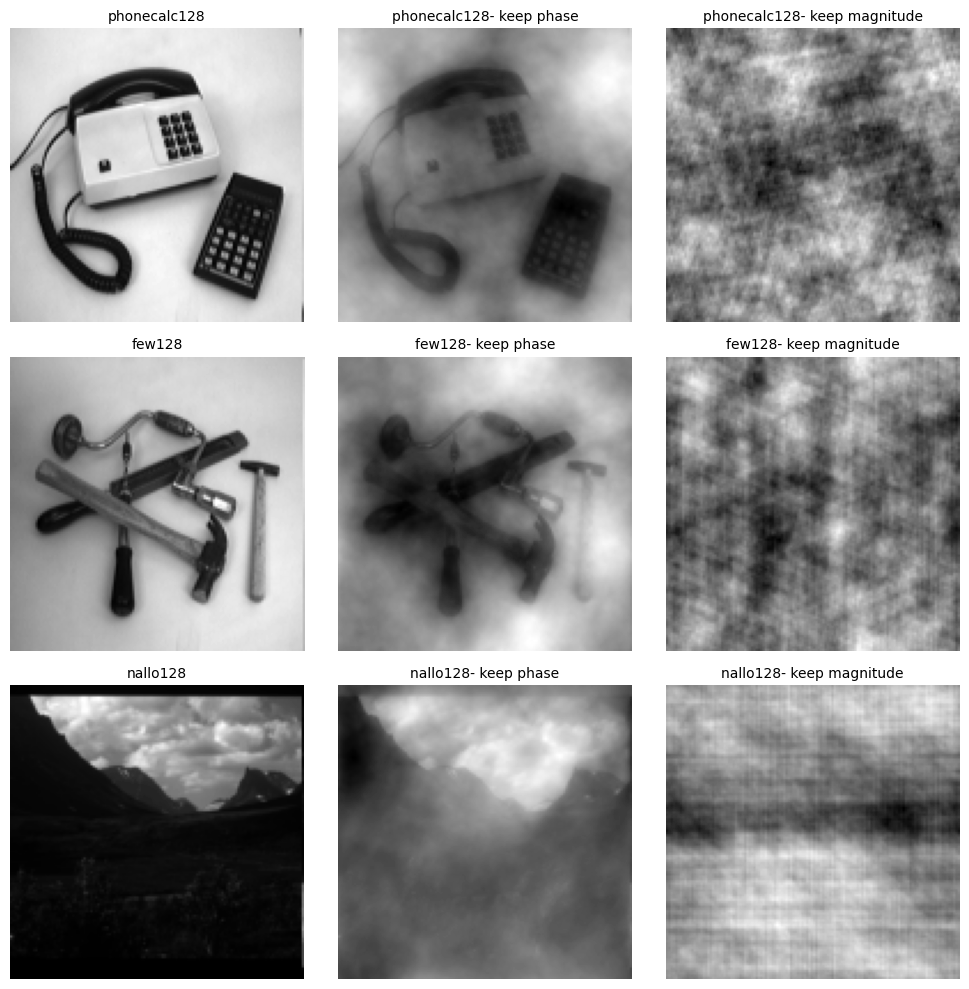

In [165]:
def question_13():
    image_arr = [np.load("Images-npy/phonecalc128.npy"), np.load("Images-npy/few128.npy"), np.load("Images-npy/nallo128.npy")]
    title_arr = ["phonecalc128", "few128", "nallo128"]

    # Create a 3x3 plot array
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))   

    # Plot data on each subplot
    for i in range(3):
        axes[i, 0].imshow(image_arr[i], cmap="gray")
        axes[i, 0].set_title(title_arr[i])
        axes[i, 0].axis("off")

    for i in range(3):
        axes[i, 1].imshow(pow2image(image_arr[i]), cmap="gray")
        axes[i, 1].set_title(title_arr[i] + "- keep phase")
        axes[i, 1].axis("off")

    for i in range(3):
        axes[i, 2].imshow(randphaseimage(image_arr[i]), cmap="gray")
        axes[i, 2].set_title(title_arr[i] + "- keep magnitude")
        axes[i, 2].axis("off")
    
    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

question_13()

**Answer** <br>
The magnitude of the Fourier transform represents the amplitude of each frequency component in the image. The higher the magnitude component, the more dominant the frequency component within the signal. The magnitude is a real and non-negative number. <br>
The phase represents the phase shift or time delay of each frequency component and is important in the reconstruction of the original image as it contains information about the position and alignment of the edges and contours in the spatial domain of the image. The phase of an image is generally unique. This means that different images with the same magnitude spectrum can have significantly different phase spectra. <br>
When using pow2image, we see that the position of the edges of the image are preserved but the magnitude has changed. When using randphaseimage, we see that the images cannot be recognized as the positions of the edges have not been preserved within the image. This means that the image can be recognized if the phase is preserved even if the magnitude is lost. <br>


**Question 14** Show the impulse response and variance for the above-mentioned t-values. What are the variances of your discretized Gaussian kernel for t = 0.1, 0.3, 1.0, 10.0 and 100.0?


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\karen\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\karen\AppData\Local\Temp\ipykernel_20836\2532239158.py", line 7, in <module>
    psf = gaussfft(deltafcn(128, 128), t)
  File "c:\Users\karen\git\Computer-Vision-course\Labs\Lab 1\Karen\gaussfft.py", line 7, in gaussfft
NameError: name 'result' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\karen\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\karen\AppData\Roaming\Python\Python39\site-packages\IPython\core\ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\karen\AppData\Roaming\Pytho

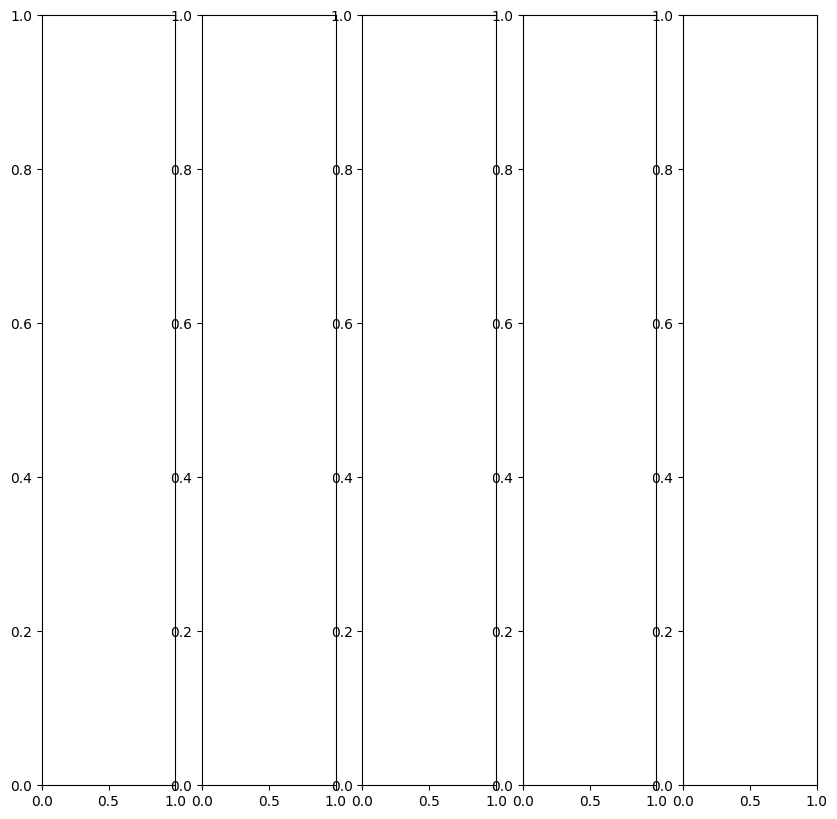

In [170]:
t_arr = [0.1, 0.3, 1.0, 10.0, 100.0]

# Create a 3x3 plot array
fig, axes = plt.subplots(1, 5, figsize=(10, 10)) 

for t in t_arr:
    psf = gaussfft(deltafcn(128, 128), t)
    axes[0, t].imshow(psf, cmap="gray")
    axes[0, t].set_title("t" + t)
    axes[0, t].set_suptitle("variance" + variance(psf))
    axes[0, t].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()